In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'ecommerce_customer_data.csv')
df.head()

,User_ID,Gender,Age,Location,Device_Type,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
0,1,Female,23,Ahmedabad,Mobile,60,30,1,0
1,2,Male,25,Kolkata,Tablet,30,38,9,4
2,3,Male,32,Bangalore,Desktop,37,13,5,0
3,4,Male,35,Delhi,Mobile,7,20,10,3
4,5,Male,27,Bangalore,Tablet,35,20,8,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   User_ID                500 non-null    int64 
 1   Gender                 500 non-null    object
 2   Age                    500 non-null    int64 
 3   Location               500 non-null    object
 4   Device_Type            500 non-null    object
 5   Product_Browsing_Time  500 non-null    int64 
 6   Total_Pages_Viewed     500 non-null    int64 
 7   Items_Added_to_Cart    500 non-null    int64 
 8   Total_Purchases        500 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 35.3+ KB


In [4]:
df.isnull().sum()

User_ID                  0
Gender                   0
Age                      0
Location                 0
Device_Type              0
Product_Browsing_Time    0
Total_Pages_Viewed       0
Items_Added_to_Cart      0
Total_Purchases          0
dtype: int64

Distribution of age

Text(0.5, 1.0, 'Distribution of Age')

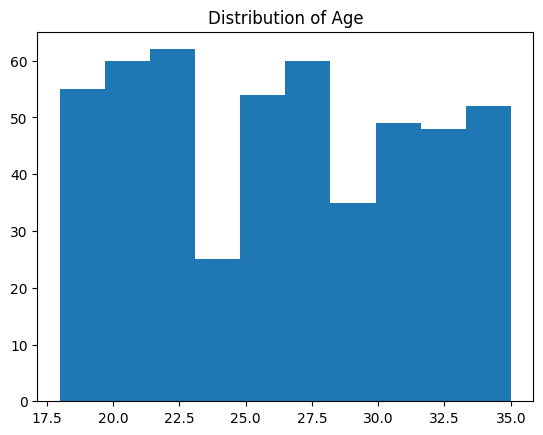

In [5]:
plt.hist(df['Age'])
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Count of users by gender')

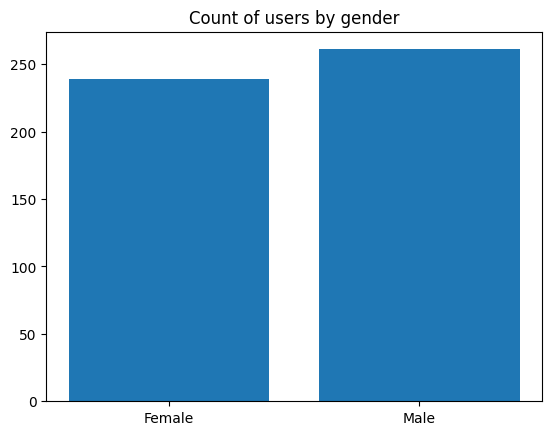

In [6]:
count_of_customers_by_gender = df.groupby('Gender').size().reset_index()
plt.bar(count_of_customers_by_gender['Gender'], count_of_customers_by_gender[0])
plt.title('Count of users by gender')

Text(0.5, 1.0, 'Product Browsing Time')

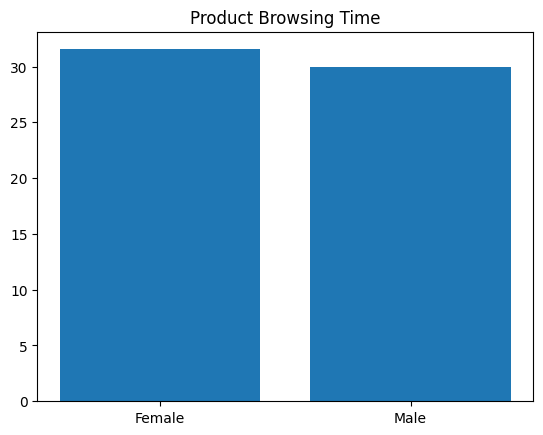

In [7]:
brow_time_by_gender = df.groupby('Gender')['Product_Browsing_Time'].mean().reset_index()
plt.bar(brow_time_by_gender['Gender'], brow_time_by_gender['Product_Browsing_Time'])
plt.title('Product Browsing Time')

Text(0, 0.5, 'Total Pages Viewed')

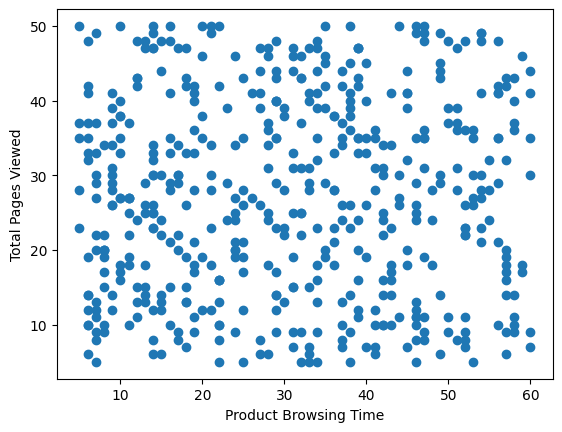

In [8]:
plt.scatter(df['Product_Browsing_Time'],df['Total_Pages_Viewed'])
plt.xlabel('Product Browsing Time')
plt.ylabel('Total Pages Viewed')

Text(0, 0.5, 'Product Browsing Time')

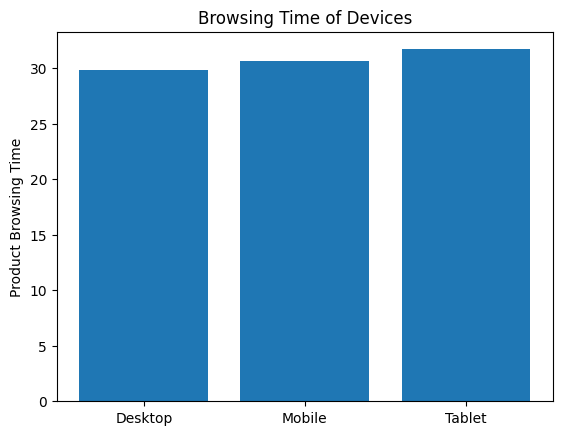

In [9]:
brow_time_by_device=df.groupby('Device_Type')['Product_Browsing_Time'].mean().reset_index()
plt.bar(brow_time_by_device['Device_Type'], brow_time_by_device['Product_Browsing_Time'])
plt.title('Browsing Time of Devices')
plt.ylabel('Product Browsing Time')

Splitting the age column into intervals to compare product browsing time across different age groups.

In [27]:
df['Age_Interval'] = pd.cut(df['Age'],bins=[17,25,35,65], labels=['17-25','25-35','35+'])

C:\Users\zeyne\AppData\Local\Temp\ipykernel_13520\812921739.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  brow_time_by_age = df.groupby(['Age_Interval'])['Product_Browsing_Time'].mean().reset_index()


Text(0, 0.5, 'Product Browsing Time')

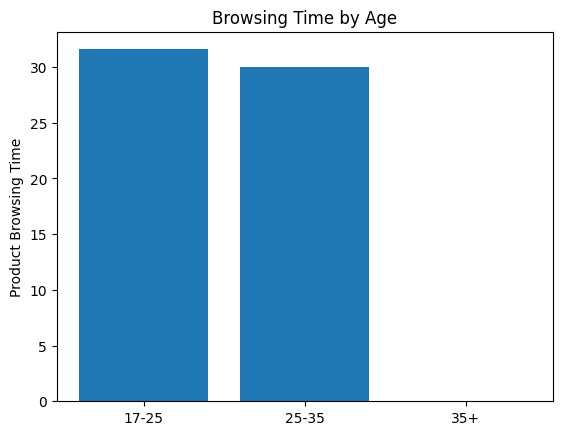

In [28]:
brow_time_by_age = df.groupby(['Age_Interval'])['Product_Browsing_Time'].mean().reset_index()
brow_time_by_age['Product_Browsing_Time'].fillna(0, inplace=True)
plt.bar(brow_time_by_age['Age_Interval'], brow_time_by_age['Product_Browsing_Time'])
plt.title('Browsing Time by Age')
plt.ylabel('Product Browsing Time')

In [29]:
df['Total_Purchases'].unique()

array([0, 4, 3, 2, 5, 1], dtype=int64)

Text(0, 0.5, 'Product Browsing Time')

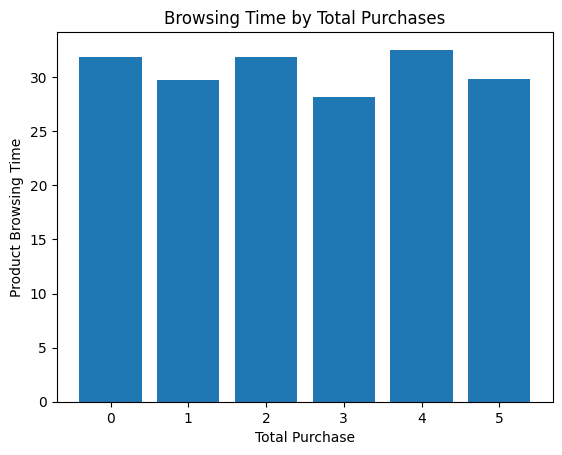

In [34]:
brow_time_by_purchase = df.groupby('Total_Purchases')['Product_Browsing_Time'].mean().reset_index()
plt.bar(brow_time_by_purchase['Total_Purchases'], brow_time_by_purchase['Product_Browsing_Time'])
plt.title('Browsing Time by Total Purchases')
plt.xlabel('Total Purchase')
plt.ylabel('Product Browsing Time')

Let's perform a statistical test to see whether the difference in product browsing time accross different total purchase groups is statistically significant. Since we have 6 groups(Total Purchases),we can use an ANOVA test. However, ANOVA assumes that the data in each group is normally distributed. So first, let's check the normality assumption.

In [45]:
import scipy.stats as stats

In [60]:
from scipy.stats import shapiro

for group in df['Total_Purchases'].unique():
    stat, p = shapiro(df[df['Total_Purchases'] == group]['Product_Browsing_Time'])
    print(f"Group {group}: p-value = {p:.4f}")

Group 0: p-value = 0.0035
Group 4: p-value = 0.0024
Group 3: p-value = 0.0018
Group 2: p-value = 0.0004
Group 5: p-value = 0.0042
Group 1: p-value = 0.0019


Since the p-values are less than 0.05, we reject the null hypothesis of normality. This means the data is not normally distributed. Because ANOVA assumes normality, we cannot use it. Instead, we will perform a permutation test as a non-parametric alternative.

In [64]:
import numpy as np

Permutation Procedure

In [65]:
observed_variance = df.groupby('Total_Purchases')['Product_Browsing_Time'].mean().var()
print('Observed means:', df.groupby('Total_Purchases')['Product_Browsing_Time'].mean().values.ravel())
print('Variance:', observed_variance)
def perm_test(df):
    df = df.copy()
    df['Product_Browsing_Time'] = np.random.permutation(df['Product_Browsing_Time'].values)
    return df.groupby('Total_Purchases')['Product_Browsing_Time'].mean().var()
perm_variance = [perm_test(df) for _ in range(3000)]
print('Pr(Prob)', np.mean([var > observed_variance for var in perm_variance]))

Observed means: [31.87878788 29.72307692 31.8988764  28.14457831 32.5375     29.80952381]
Variance: 2.8947142810796445
Pr(Prob) 0.4523333333333333


The p-value is 0.45, which is greater than 0.05. This means there is no statistically significant difference in product browsing time across different purchase groups. In other words, we do not have enough evidence to conclude that browsing time influences the number of purchases.

**Calculating churn rate**

In [76]:
df['Churned'] = df['Total_Purchases'] == 0
churn_rate = df['Churned'].value_counts()[1] / df['Churned'].count()

C:\Users\zeyne\AppData\Local\Temp\ipykernel_13520\907054581.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  churn_rate = df['Churned'].value_counts()[1] / df['Churned'].count()


In [77]:
print(f'Churn Rate : {churn_rate}')

Churn Rate : 0.198
